In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Sklearn Lib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# Tensorflow
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [ ]:
# Baca CSV File
df = pd.read_csv('/content/bawang_merah_bappebti.csv')

In [ ]:
# Preview Data
df

,date,price
0,2019-09-03,12000.0
1,2019-09-04,12000.0
2,2019-09-05,12000.0
3,2019-09-06,12000.0
4,2019-09-07,11700.0
...,...,...
1475,2024-04-27,38000.0
1476,2024-04-28,38000.0
1477,2024-04-29,38000.0
1478,2024-04-30,38000.0


In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1480 non-null   object 
 1   price   1480 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.2+ KB


In [ ]:
# Mentransformasikan Data ke Format Datetime
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d')
df.sort_values(by='date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1480 non-null   datetime64[ns]
 1   price   1480 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.2 KB


In [ ]:
# Preview Data
df

,date,price
0,2019-09-03,12000.0
1,2019-09-04,12000.0
2,2019-09-05,12000.0
3,2019-09-06,12000.0
4,2019-09-07,11700.0
...,...,...
1475,2024-04-27,38000.0
1476,2024-04-28,38000.0
1477,2024-04-29,38000.0
1478,2024-04-30,38000.0


In [ ]:
# Panjang Data
len(df)

1480

In [ ]:
# Check Duplicates data
df.duplicated(subset=['date'])

0       False
1       False
2       False
3       False
4       False
        ...  
1475    False
1476    False
1477    False
1478    False
1479    False
Length: 1480, dtype: bool

In [ ]:
# Check Null Data
df.isnull().sum().sum()

0

In [ ]:
# Ploting Chart Data Historis Harga Bawang
fig = px.line(y=df.price, x=df.date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Waktu Historis",
                  yaxis_title="Harga Bawang",
                  title={'text': "Histori Data Harga Bawang", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [ ]:
# Data Scaling
scaler = MinMaxScaler()
scaler.fit(df.price.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
# Set Panjang Data Test 20%
test_size = int(len(df) * 0.2)
test_size

296

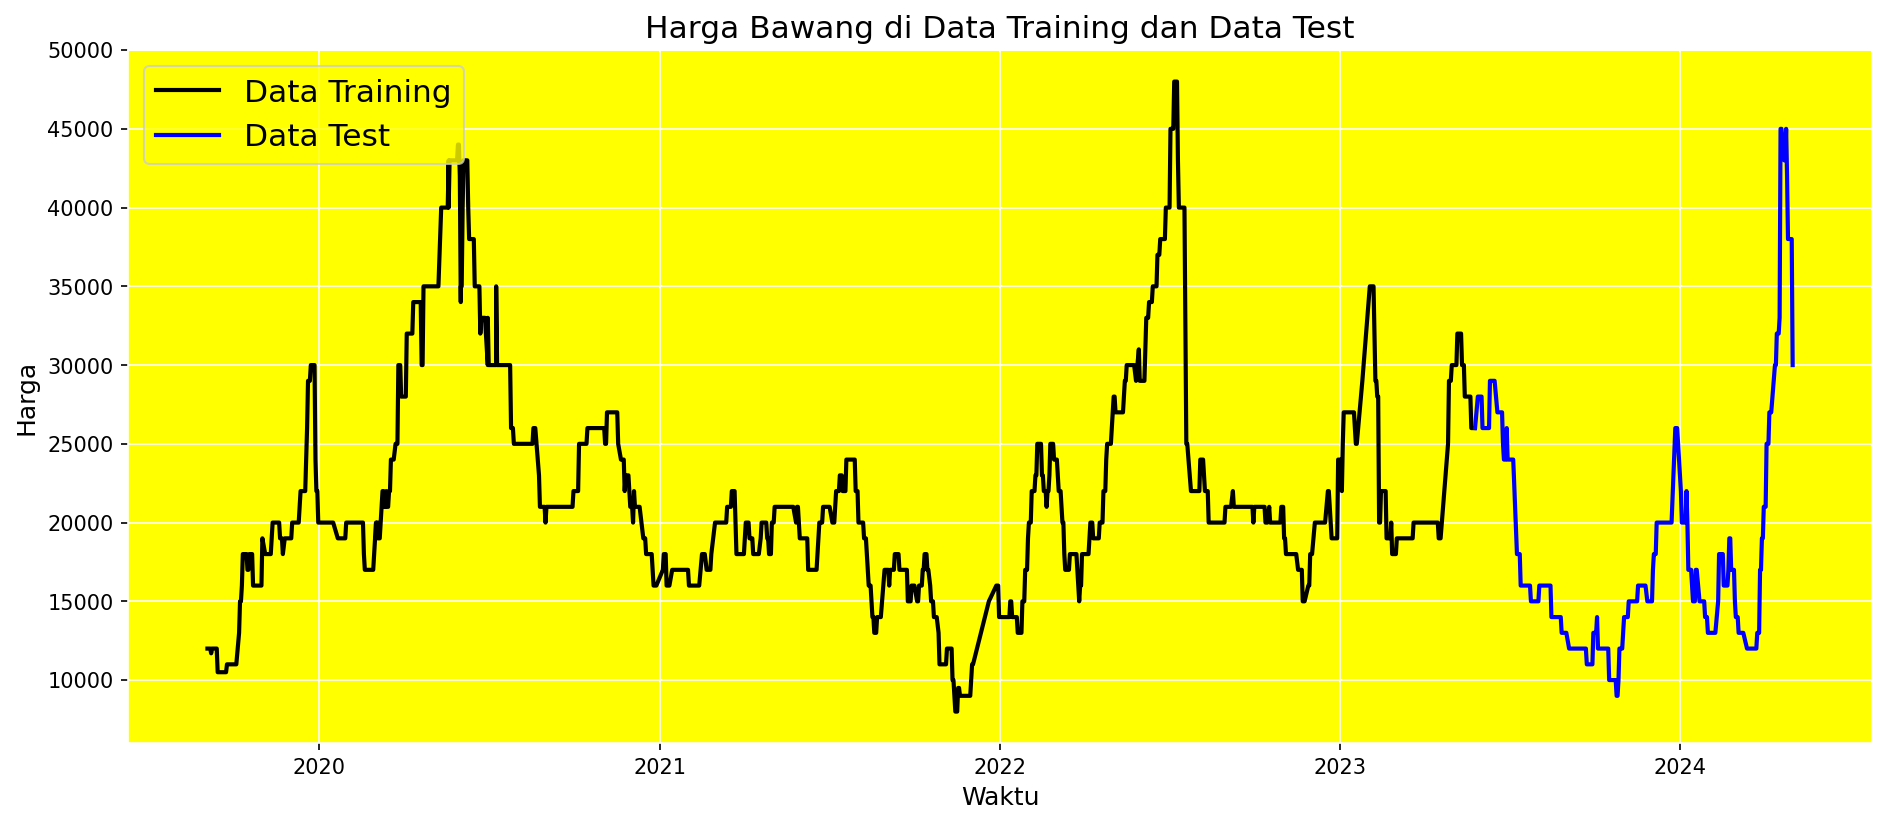

In [ ]:
# Ploting Data Training dan Test
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.date[:-test_size], df.price[:-test_size], color='black', lw=2)
plt.plot(df.date[-test_size:], df.price[-test_size:], color='blue', lw=2)
plt.title('Harga Bawang di Data Training dan Data Test', fontsize=15)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.legend(['Data Training', 'Data Test'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
# Panjang data Loppback 30 hari
window_size = 30

# Persiapkan data Training 80% dari data, dan normalisasikan
train_data = df.price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

# Siapkan Variable untuk menampung data Train, disesuaikan dengan data loopback yaitu 30
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
print("Panjang Data Train : ", len(train_data))
print("Panjang Data Train X - loopback : ", len(X_train))
print("Panjang Data Train y - loopback : ", len(y_train))

Panjang Data Train :  1184
Panjang Data Train X - loopback :  1154
Panjang Data Train y - loopback :  1154


In [ ]:
# Persiapkan data test
test_data = df.price[-test_size-30:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

# Siapkan Variable untuk menampung data Test, disesuaikan dengan data loopback yaitu 30
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-30:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
print("Panjang Data Test : ", len(test_data))
print("Panjang Data Test X - loopback : ", len(X_test))
print("Panjang Data Test y - loopback : ", len(y_test))

Panjang Data Test :  326
Panjang Data Test X - loopback :  296
Panjang Data Test y - loopback :  296


In [ ]:
# Now X_train and X_test are nested lists (two-dimensional lists) and y_train is a one-dimensional list.
# We need to convert them to numpy arrays with a higher dimension,
# which is the data format accepted by TensorFlow when training the neural network:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (1154, 30, 1)
y_train Shape:  (1154, 1)
X_test Shape:   (296, 30, 1)
y_test Shape:   (296, 1)


In [ ]:
# Create LSTM Model
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

In [ ]:
# Training Model
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 30, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

In [ ]:
# Model Evaluation
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

10/10 [==============================] - 1s 5ms/step


In [ ]:
# Calculate Evaluation Value of Model
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

print("Test Loss:", result) # MSE
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.001444638124667108
Test MAPE: 0.08502275331246878
Test Accuracy: 0.9149772466875312


In [ ]:
# Save Model
model.save("onionLSTM91.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



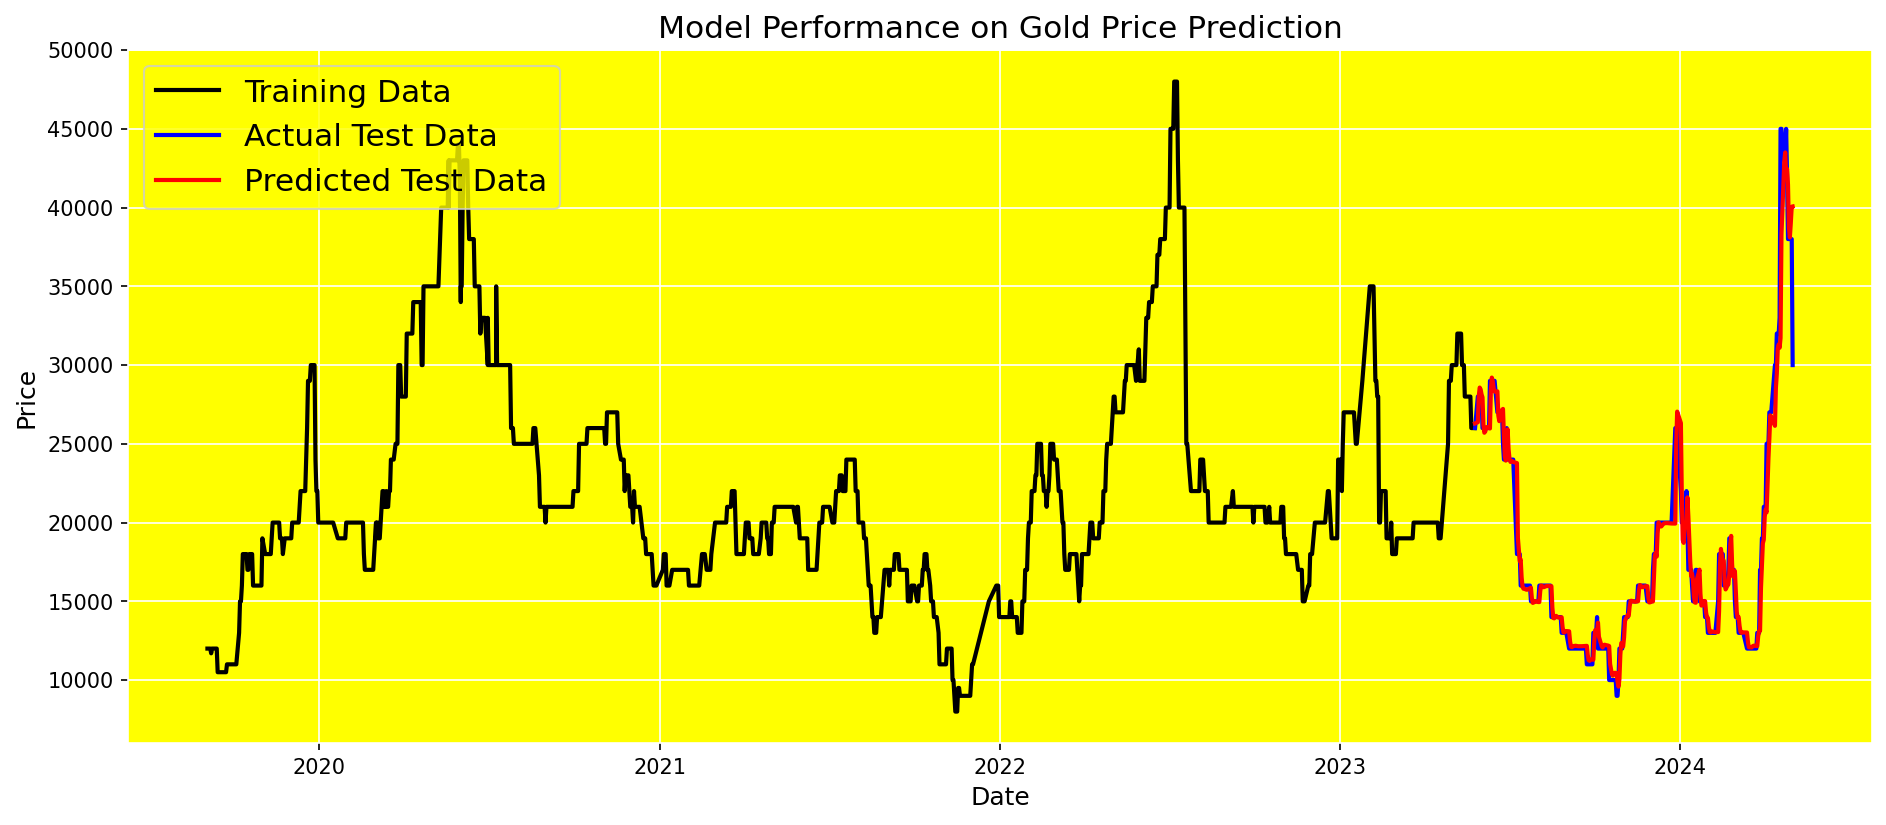

In [ ]:
# Visualizing Results

# Mengembalikan nilai yang dinormalisasi ke data yang asli
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)
real_train_data = scaler.inverse_transform(train_data)

# Menggambar Plot
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.date.iloc[:-test_size], real_train_data, color='black', lw=2)
plt.plot(df.date.iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df.date.iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
# Data Perbandingan dalam bentuk tabel
flatent_test_true = [item[0] for item in y_test_true]
flatent_test_pred = [item[0] for item in y_test_pred]

table_data = pd.DataFrame({
    'Harga Asli': flatent_test_true,
    'Harga Prediksi': flatent_test_pred,
})

# Calculate the Percentage Error (often used in Mean Absolute Percentage Error or MAPE)
table_data['Persentase Error'] = ((table_data['Harga Asli'] / table_data['Harga Prediksi']) * 100)

table_data

,Harga Asli,Harga Prediksi,Persentase Error
0,26000.0,26297.113281,98.870168
1,28000.0,26369.001953,106.185285
2,28000.0,28025.238281,99.909944
3,28000.0,28573.496094,97.992909
4,28000.0,28452.871094,98.408347
...,...,...,...
291,38000.0,38734.382812,98.104054
292,38000.0,38101.812500,99.732788
293,38000.0,39013.339844,97.402581
294,38000.0,40059.738281,94.858333
